## Session 4 - Quantifying Model Quality

### 1. Facebook Regression

**Build a regression model by minimizing the mean squared error (MSE) to predict any of the: comments,likes, shares.**

In [52]:
#!pip install sklearn-pandas
#!pip install delayed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model, neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split

/Users/koredeakande/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/koredeakande/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
fb_data = pd.read_csv('facebook_train.csv')
fb_data.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21


The input variables:
- total_followers: The number of followers of the group.
- type: Specifies whether it is of type "photo," "status," or "link."
- category: There are three distinct categories; 1, 2, and 3.
- month: The month that the post was created.
- weekday: The day of the week that the post was created.
- paid: A 0/1 flag indicating whether the post was a paid-for promotion.

The output variables:
- comment: The number of comments that the post generated.
- like: The number of likes that the post generated.
- share: The number of shares that the post generated.



#### Encoding type (categorical variable) as numeric variable 
We one-hot encode instead of using other encoding schemes in order to avoid our machine learning algorithms ascribing higher importance to higher values

In [5]:
type_encoded = pd.get_dummies(fb_data.type.str.lower(), prefix ='type')
fb_data = pd.concat([fb_data, type_encoded], axis=1).drop(['type','type_video'], axis=1)
fb_data.head()

,total_followers,category,month,weekday,hour,paid,comment,like,share,type_link,type_photo,type_status
0,124050,3,6,4,17,1,3,77,16,0,1,0
1,132556,2,8,3,24,0,11,313,50,0,1,0
2,92786,2,2,6,17,1,2,145,39,0,1,0
3,135632,1,9,2,1,0,2,299,49,0,1,0
4,139540,1,12,3,17,1,7,229,21,1,0,0


For this prediction task, my focus is on **likes**

#### Building a regression model

In [14]:
#Getting the subset of relevant input variables
input_vars = ['total_followers','type_link','type_photo','type_status',
              'category','month','weekday','paid']

#Getting the input and output variables
X = fb_data[input_vars]
y = fb_data.like

#Split the data to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Fit the model to the training data
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Variable Coefficients")
for input_var,coef in zip(input_vars,regr.coef_):
    print(f"- {input_var}: {coef:.3f}")

Variable Coefficients
- total_followers: 0.005
- type_link: -36.380
- type_photo: 31.541
- type_status: 6.681
- category: 33.648
- month: -15.140
- weekday: 15.301
- paid: 117.541


**Loading New Data For Further Model Evaluation**

In [15]:
new_data = pd.read_csv('facebook_test.csv')

Data preprocessing

In [66]:
new_type_encoded = pd.get_dummies(new_data.type.str.lower(), prefix ='type')
new_data = pd.concat([new_data, new_type_encoded], axis=1).drop(['type'], axis=1)
new_data.head()

,total_followers,category,month,weekday,hour,paid,comment,like,share,type_link,type_photo,type_status
0,136568,1,10,4,1,0,0,8,0,0,1,0
1,137178,1,11,1,16,1,16,210,55,0,1,0
2,134414,2,10,1,15,0,15,384,67,0,1,0
3,124910,1,6,1,2,0,0,177,8,0,1,0
4,132112,2,8,2,15,0,3,44,12,0,1,0


In [67]:
#Getting the subset of relevant input variables
input_vars = ['total_followers','type_link','type_photo','type_status',
              'category','month','weekday','paid']

#Getting the input and output variables
new_X = new_data[input_vars]
new_y = new_data.like

#### Measuring model performance

- **Mean squared error (MSE)**
    
     Similar to the previous class, I again find that my training set MSE is greater than my test set MSE (see below). This is likely due to the training set having more data points and also by chance, having more outliers which MSE penalizes.

In [78]:
print('Training set MSE: %.2f likes² \n' % metrics.mean_squared_error(y_train, regr.predict(X_train)))

print('Test set MSE: %.2f likes² \n' % metrics.mean_squared_error(y_test, y_pred))

print('New data MSE: %.2f likes² \n' % metrics.mean_squared_error(new_y, regr.predict(new_X)))

Training set MSE: 168613.06 likes² 

Test set MSE: 153459.40 likes² 

New data MSE: 53280.27 likes² 



- **Mean absolute error (MAS)**
    
    The test set would appear to have more predictions with higher errors than the training set

In [79]:
print('Training set MAE: %.2f likes \n' % metrics.mean_absolute_error(y_train, regr.predict(X_train)))

print('Test set MAE: %.2f likes \n' % metrics.mean_absolute_error(y_test, y_pred))

print('New data MAE: %.2f likes \n' % metrics.mean_absolute_error(new_y, regr.predict(new_X)))

Training set MAE: 180.97 likes 

Test set MAE: 196.05 likes 

New data MAE: 147.18 likes 



- **Median absolute error**

In [80]:
print('Training set Median Absolute Error: %.2f likes \n' % metrics.median_absolute_error(y_train, regr.predict(X_train)))

print('Test set Median Absolute Error: %.2f likes \n' % metrics.median_absolute_error(y_test, y_pred))

print('New data Median Absolute Error: %.2f likes \n' % metrics.median_absolute_error(new_y, regr.predict(new_X)))

Training set Median Absolute Error: 120.43 likes 

Test set Median Absolute Error: 113.58 likes 

New data Median Absolute Error: 125.65 likes 



Outliers probably drove the differences we see in MAE and Median Absolute Error since the mean is more prone to being affected by outliers than the median.

- **The coefficient of determination (or R²)**

In [81]:
print('Training set R²: %.2f \n' % metrics.r2_score(y_train, regr.predict(X_train)))

print('Test set R²: %.2f \n' % metrics.r2_score(y_test, y_pred))

print('New data R²: %.2f \n' % metrics.r2_score(new_y, regr.predict(new_X)))

Training set R²: 0.04 

Test set R²: 0.02 

New data R²: -0.07 



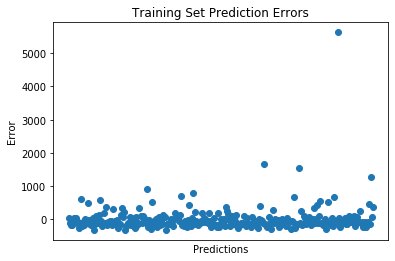

In [87]:
plt.plot(np.array(y_train) - np.array(regr.predict(X_train)),marker='o',linestyle='')
plt.ylabel('Error')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Training Set Prediction Errors')
plt.xlabel('Predictions')
plt.show()

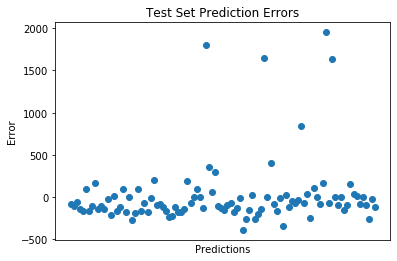

In [84]:
plt.plot(np.array(y_test) - np.array(y_pred),marker='o',linestyle='')
plt.ylabel('Error')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Test Set Prediction Errors')
plt.xlabel('Predictions')
plt.show()

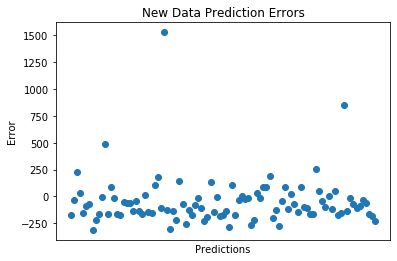

In [89]:
plt.plot(np.array(new_y) - np.array(regr.predict(new_X)),marker='o',linestyle='')
plt.ylabel('Error')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('New Data Prediction Errors')
plt.xlabel('Predictions')
plt.show()

### 2. Casualty Classification

In [22]:
casualty_df = pd.read_csv('casualty_train.csv')
casualty_df.head()

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010


In [23]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232835 entries, 0 to 232834
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   casualty_class       232835 non-null  object
 1   gender               232835 non-null  object
 2   age                  232835 non-null  object
 3   severe               232835 non-null  bool  
 4   pedestrian_location  43259 non-null   object
 5   pedestrian_movement  43259 non-null   object
 6   travel               232835 non-null  object
 7   year                 232835 non-null  int64 
dtypes: bool(1), int64(1), object(6)
memory usage: 12.7+ MB


/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The input variables are:
- casualty_class: One of "passenger," "driver," and "pedestrian."
- gender: Male of female.
- age: Age of the casualty in years.
- pedestrian_location: This field is only valid for pedestrian casualties and specifies where the pedestrian was when the incident occurred.
- pedestrian_movement: This field is only valid for pedestrian casualties.
- travel: One of "bicycle," "pedestrian," "motorbike," "car," "bus," "taxi," and "other."
- year: The year in which the casualty occurred.

And the output variable will be severe, which indicates whether or not the person was severely injured or not.

**Build a classification model to predict whether a casualty is severe or not. Your model should aim to maximize the accuracy of its predictions.**

**a. Observing the class distribution of the severe variable**

In [24]:
casualty_df.severe.value_counts(normalize=True)

False    0.89237
True     0.10763
Name: severe, dtype: float64

While the prompt asks to maximize accuracy, I also look into precision and recall. This is because given the high class imbalance as indicated above, accuracy is a poor metric for this problem. Specifically, an accuracy of ~89% can be obtained by simply predicting all the cases as not severe.

**b. Data preprocessing**

In [25]:
def df_preparer(df):
    
    """
    Function to clean and transform an inputted pandas dataframe for use with the casualty problem
    """
    
    #Drop rows where age = 'Unknown'
    casualty_df = df[df.age != 'Unknown']

    #Convert variables to numeric 
    casualty_df[['severe','age']] = casualty_df[['severe','age']].astype('int')

    #Cleaning pedestrian_location – Replace nan with 'Unknown' (they are essentially the same)
    casualty_df.pedestrian_location = casualty_df.pedestrian_location.fillna('Unknown')

    #Cleaning pedestrian_movement – Replace nan with 'Unknown Or Other' (it would fall into Unknown)
    casualty_df.pedestrian_movement = casualty_df.pedestrian_movement.fillna('Unknown Or Other')

    encoded_df = pd.get_dummies(casualty_df, 
                                dummy_na=True, 
                                columns = ["casualty_class", "gender", "pedestrian_location", 
                                           "pedestrian_movement", "travel"])
    
    
    return encoded_df
    
    

In [26]:
processed_df = df_preparer(casualty_df)
processed_df.head()

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,severe,year,casualty_class_driver,casualty_class_passenger,casualty_class_pedestrian,casualty_class_nan,gender_female,gender_male,gender_nan,...,pedestrian_movement_Unknown Or Other,pedestrian_movement_nan,travel_bicycle,travel_bus,travel_car,travel_motorbike,travel_other,travel_pedestrian,travel_taxi,travel_nan
0,33,0,2007,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,20,0,2005,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,52,0,2006,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,17,0,2012,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,20,0,2010,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


**c. Split dataset into training and test set**

In [27]:
#Getting the input and output variables
X = processed_df.drop(['severe'],axis=1)
y = processed_df.severe

#Split the data to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**d. Modeling 1: SVM**

**Cross-fold validation to determine best C for SVC Model**

In [43]:
from sklearn.model_selection import cross_validate
from sklearn import svm
import warnings
warnings.filterwarnings('once')

X = np.array(X_train)
y = np.array(y_train)
cv_results = []

for C in [0.1,1,10]:
    #Set class weight to balanced to account for class imbalance
    clf = svm.LinearSVC(C=C, class_weight='balanced')
    scores = cross_validate(clf, X, y, cv=3, scoring= ['accuracy','precision','recall','roc_auc'])
    cv_results.append((C,scores))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to cont

In [44]:
cv_results

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0.1,
  {'fit_time': array([16.18897796, 19.39748406, 17.13270116]),
   'score_time': array([0.0648818 , 0.07262707, 0.0667479 ]),
   'test_accuracy': array([0.89210201, 0.89211848, 0.89211848]),
   'test_precision': array([0., 0., 0.]),
   'test_recall': array([0., 0., 0.]),
   'test_roc_auc': array([0.65948683, 0.66387554, 0.66463829])}),
 (1,
  {'fit_time': array([18.63884306, 18.38720894, 17.02703691]),
   'score_time': array([0.07571793, 0.13727999, 0.079211  ]),
   'test_accuracy': array([0.89210201, 0.89211848, 0.89211848]),
   'test_precision': array([0., 0., 0.]),
   'test_recall': array([0., 0., 0.]),
   'test_roc_auc': array([0.65911926, 0.66416311, 0.66433267])}),
 (10,
  {'fit_time': array([16.97871614, 16.997298  , 16.81591582]),
   'score_time': array([0.06845069, 0.06409907, 0.06313515]),
   'test_accuracy': array([0.89210201, 0.89211848, 0.10788152]),
   'test_precision': array([0.        , 0.        , 0.10788152]),
   'test_recall': array([0., 0., 1.]),
   'test_roc_

In [45]:
for C,result in cv_results:
    
    print('C =', C)
    print('- Test accuracy:', result['test_accuracy'].mean())
    print('- Precision:', result['test_precision'].mean())
    print('- Recall:', result['test_recall'].mean())
    print('- ROC:', result['test_roc_auc'].mean())
    print('\n')

C = 0.1
- Test accuracy: 0.8921129899664693
- Precision: 0.0
- Recall: 0.0
- ROC: 0.6626668850857962


C = 1
- Test accuracy: 0.8921129899664693
- Precision: 0.0
- Recall: 0.0
- ROC: 0.662538347613816


C = 10
- Test accuracy: 0.6307006690918939
- Precision: 0.03596050622937903
- Recall: 0.3333333333333333
- ROC: 0.6618139820705496




C=0.1 and C=10 predict with 89% accuracy, however, this is achieved by predicting all cases as being not severe, as evidenced by the precision and recall. C=1, on the otherhand, does predict both classes, albeit poorly.

Given the prompt to maximize accuracy, I select C=0.1. Note, that ROC is the determining factor for this selection.

**Loading new test data**

In [65]:
new_data2 = pd.read_csv('casualty_test.csv')

In [66]:
new_processed_df = df_preparer(casualty_df)
new_processed_df.head()

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,severe,year,casualty_class_driver,casualty_class_passenger,casualty_class_pedestrian,casualty_class_nan,gender_female,gender_male,gender_nan,...,pedestrian_movement_Unknown Or Other,pedestrian_movement_nan,travel_bicycle,travel_bus,travel_car,travel_motorbike,travel_other,travel_pedestrian,travel_taxi,travel_nan
0,33,0,2007,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,20,0,2005,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,52,0,2006,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,17,0,2012,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,20,0,2010,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [67]:
#Getting the input and output variables
new_X = new_processed_df.drop(['severe'],axis=1)
new_y = new_processed_df.severe

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Training on the training set, and predicting the test set**

In [68]:
#Choose best model based on precision and recall
clf = svm.LinearSVC(C=0.1)

#Fit model on training data
clf.fit(X, y)

#Predict test set using fitted model
y_pred = clf.predict(np.array(X_test))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Predicting new data**

In [69]:
#Predict new data using fitted model
new_y_pred = clf.predict(np.array(new_X))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
print('ACCURACY')
print('- Test set classification accuracy: %.2f' % metrics.accuracy_score(y_test, y_pred))
print('- New data classification accuracy: %.2f \n' % metrics.accuracy_score(new_y, new_y_pred))

print('PRECISION')
print('- Test set precision: %.2f' % metrics.precision_score(y_test, y_pred))
print('- New data precision: %.2f \n' % metrics.precision_score(new_y, new_y_pred))
      
print('RECALL')
print('- Test set recall: %.2f' % metrics.recall_score(y_test, y_pred))
print('- New data recall: %.2f \n' % metrics.recall_score(new_y, new_y_pred))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACCURACY
- Test set classification accuracy: 0.89
- New data classification accuracy: 0.89 

PRECISION
- Test set precision: 0.00
- New data precision: 0.00 

RECALL
- Test set recall: 0.00
- New data recall: 0.00 



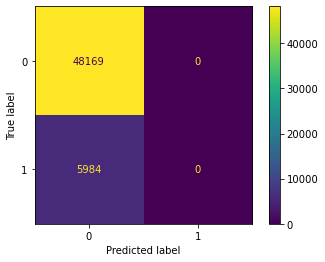

In [71]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

**e. Modeling 2: kNN**

Given the class imbalance and the poor performance of the SVM model on precision and recall, I try a new algorithm in kNN for classification. Here the metric for optimization is instead the F-1 score.

**Cross-fold validation to determine best n for kNN Model**

Here the metric of interest for the cross validation is the F1 score, which looks to balance precision and recall

In [61]:
#List to store the average f1 values for different k values
f1_scores = []

for k in range(2,11):
    
    #Train a nearest neighbour classifier with chosen k 
    knn_clf = neighbors.KNeighborsClassifier(k)
    
    #Get the scores from the cross validation
    scores = cross_validate(knn_clf, X, y, cv=5, scoring='f1')
    
    #Compute the average score for the chosen k values
    f1_scores.append((k,scores['test_score'].mean()))
    

print(f1_scores)

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(2, 0.05370482092648967), (3, 0.10313773366166863), (4, 0.03968213534380713), (5, 0.07111638305339155), (6, 0.028947444834383614), (7, 0.049866578400620296), (8, 0.021707701378755863), (9, 0.035799361139789355), (10, 0.019764012249242634)]


n=3 provided the best average F-1 score

**Training on the training set, and predicting the test set**

In [62]:
#Choose best model based on precision and recall
knn_clf = neighbors.KNeighborsClassifier(3)

#Fit model on training data
knn_clf.fit(X, y)

#Predict test set using fitted model
y_preds = knn_clf.predict(np.array(X_test))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Predicting new data**

In [63]:
#Predict new data using fitted model
new_y_preds = knn_clf.predict(np.array(new_X))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
print('ACCURACY')
print('- Test set classification accuracy: %.2f' % metrics.accuracy_score(y_test, y_preds))
print('- New data classification accuracy: %.2f \n' % metrics.accuracy_score(new_y, new_y_preds))

print('PRECISION')
print('- Test set precision: %.2f' % metrics.precision_score(y_test, y_preds))
print('- New data precision: %.2f \n' % metrics.precision_score(new_y, new_y_preds))
      
print('RECALL')
print('- Test set recall: %.2f' % metrics.recall_score(y_test, y_preds))
print('- New data recall: %.2f \n' % metrics.recall_score(new_y, new_y_preds))

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ACCURACY
- Test set classification accuracy: 0.86
- New data classification accuracy: 0.88 

PRECISION
- Test set precision: 0.19
- New data precision: 0.36 

RECALL
- Test set recall: 0.08
- New data recall: 0.15 



/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


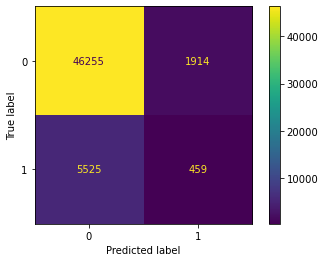

In [72]:
plot_confusion_matrix(knn_clf, X_test, y_test)  
plt.show()  

There was improved performance on the precision and recall using the kNN algorithm with 3 neighbours. Additionally, the test set accuracy was still pretty high.